<a href="https://colab.research.google.com/github/jurand71/dw_matrix_road_signs/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd "drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_signs"

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_signs


In [26]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'],train['labels']
X_test, y_test = test['features'],test['labels']

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
model = Sequential([
        Conv2D(filters=65,kernel_size=(3,3),activation='relu', input_shape = input_shape),
        Flatten(data_format=None),
        Dense(num_classes,activation='softmax')            
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 65)        1820      
_________________________________________________________________
flatten (Flatten)            (None, 58500)             0         
_________________________________________________________________
dense (Dense)                (None, 43)                2515543   
Total params: 2,517,363
Trainable params: 2,517,363
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy' ,optimizer='Adam',metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 4s 4ms/step - loss: 9.7766 - accuracy: 0.7931


In [0]:
def get_cnn_v1(input_shape,num_classes):
    return Sequential([
        Conv2D(filters=65,kernel_size=(3,3),activation='relu', input_shape = input_shape),
        Flatten(data_format=None),
        Dense(num_classes,activation='softmax')            
])
    
def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  
  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size=params_fit.get('batch_size',128),
      epochs=params_fit.get('epochs',5),
      verbose=params_fit.get('verbose',1),
      validation_data=params_fit.get('validation_data',(X_train,y_train)),
      callbacks = [tensorboard_callback]
  )

  return model

In [11]:
model = get_cnn_v1(input_shape,num_classes)
params_fit = {
    'epochs':10
}
model_trained = train_model(model, X_train, y_train, params_fit)

Epoch 1/10
272/272 [==============================] - 3s 11ms/step - loss: 21.0057 - accuracy: 0.7452 - val_loss: 0.2199 - val_accuracy: 0.9461
Epoch 2/10
272/272 [==============================] - 3s 11ms/step - loss: 0.2139 - accuracy: 0.9488 - val_loss: 0.1609 - val_accuracy: 0.9577
Epoch 3/10
272/272 [==============================] - 3s 11ms/step - loss: 0.1322 - accuracy: 0.9684 - val_loss: 0.0988 - val_accuracy: 0.9750
Epoch 4/10
272/272 [==============================] - 3s 11ms/step - loss: 0.1140 - accuracy: 0.9726 - val_loss: 0.1000 - val_accuracy: 0.9768
Epoch 5/10
272/272 [==============================] - 3s 11ms/step - loss: 0.0837 - accuracy: 0.9784 - val_loss: 0.0615 - val_accuracy: 0.9862
Epoch 6/10
272/272 [==============================] - 3s 11ms/step - loss: 0.0841 - accuracy: 0.9801 - val_loss: 0.1034 - val_accuracy: 0.9764
Epoch 7/10
272/272 [==============================] - 3s 11ms/step - loss: 0.0750 - accuracy: 0.9814 - val_loss: 0.0786 - val_accuracy: 0.980

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [30]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):
  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [31]:
predict(model_trained, X_test, y_test)

0.8346938775510204

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train, params_fit)
  return predict(model_trained, X_test, y_test)

In [34]:
def get_cnn_v2(input_shape,num_classes):
    return Sequential([
        Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape = input_shape),
        MaxPool2D(),
        Dropout(0.3),

        Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        MaxPool2D(),
        Dropout(0.3),

        Flatten(data_format=None),

        Dense(1024,activation='relu'),
        Dropout(0.3),
        Dense(num_classes,activation='softmax')            
])

train_and_predict(get_cnn_v2(input_shape,num_classes))

Epoch 1/10
272/272 [==============================] - 3s 11ms/step - loss: 5.7827 - accuracy: 0.3254 - val_loss: 1.0996 - val_accuracy: 0.7165
Epoch 2/10
272/272 [==============================] - 3s 11ms/step - loss: 1.0040 - accuracy: 0.7046 - val_loss: 0.3173 - val_accuracy: 0.9247
Epoch 3/10
272/272 [==============================] - 3s 11ms/step - loss: 0.5440 - accuracy: 0.8401 - val_loss: 0.1474 - val_accuracy: 0.9656
Epoch 4/10
272/272 [==============================] - 3s 11ms/step - loss: 0.3583 - accuracy: 0.8930 - val_loss: 0.0855 - val_accuracy: 0.9797
Epoch 5/10
272/272 [==============================] - 3s 10ms/step - loss: 0.2846 - accuracy: 0.9161 - val_loss: 0.0653 - val_accuracy: 0.9873
Epoch 6/10
272/272 [==============================] - 3s 11ms/step - loss: 0.2295 - accuracy: 0.9326 - val_loss: 0.0474 - val_accuracy: 0.9885
Epoch 7/10
272/272 [==============================] - 3s 11ms/step - loss: 0.1996 - accuracy: 0.9406 - val_loss: 0.0417 - val_accuracy: 0.9920

0.9321995464852608

In [35]:
def get_cnn_v3(input_shape,num_classes):
    return Sequential([
        Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape = input_shape),
        Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        MaxPool2D(),
        Dropout(0.3),

        Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        MaxPool2D(),
        Dropout(0.3),

        Flatten(data_format=None),

        Dense(1024,activation='relu'),
        Dropout(0.3),
        Dense(num_classes,activation='softmax')            
])

train_and_predict(get_cnn_v3(input_shape,num_classes))

Epoch 1/10
272/272 [==============================] - 4s 14ms/step - loss: 1.8914 - accuracy: 0.5527 - val_loss: 0.3645 - val_accuracy: 0.9202
Epoch 2/10
272/272 [==============================] - 4s 13ms/step - loss: 0.3940 - accuracy: 0.8822 - val_loss: 0.0882 - val_accuracy: 0.9788
Epoch 3/10
272/272 [==============================] - 4s 13ms/step - loss: 0.2181 - accuracy: 0.9355 - val_loss: 0.0415 - val_accuracy: 0.9902
Epoch 4/10
272/272 [==============================] - 4s 13ms/step - loss: 0.1591 - accuracy: 0.9534 - val_loss: 0.0264 - val_accuracy: 0.9949
Epoch 5/10
272/272 [==============================] - 4s 13ms/step - loss: 0.1055 - accuracy: 0.9689 - val_loss: 0.0232 - val_accuracy: 0.9952
Epoch 6/10
272/272 [==============================] - 4s 13ms/step - loss: 0.0994 - accuracy: 0.9705 - val_loss: 0.0142 - val_accuracy: 0.9961
Epoch 7/10
272/272 [==============================] - 4s 13ms/step - loss: 0.0788 - accuracy: 0.9770 - val_loss: 0.0095 - val_accuracy: 0.9981

0.9782312925170068

In [37]:
def get_cnn_v4(input_shape,num_classes):
    return Sequential([
        Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape = input_shape),
        Conv2D(filters=32,kernel_size=(3,3),activation='relu', padding='same'),
        MaxPool2D(),
        Dropout(0.3),

        Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'),
        Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        MaxPool2D(),
        Dropout(0.3),

        Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'),
        Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        MaxPool2D(),
        Dropout(0.3),

        Flatten(data_format=None),

        Dense(1024,activation='relu'),
        Dropout(0.3),

        Dense(1024,activation='relu'),
        Dropout(0.3),
        Dense(num_classes,activation='softmax')            
])

train_and_predict(get_cnn_v4(input_shape,num_classes))

Epoch 1/10
272/272 [==============================] - 4s 16ms/step - loss: 2.8315 - accuracy: 0.2324 - val_loss: 1.3974 - val_accuracy: 0.5713
Epoch 2/10
272/272 [==============================] - 4s 16ms/step - loss: 1.0625 - accuracy: 0.6579 - val_loss: 0.3103 - val_accuracy: 0.9034
Epoch 3/10
272/272 [==============================] - 4s 15ms/step - loss: 0.4888 - accuracy: 0.8435 - val_loss: 0.1132 - val_accuracy: 0.9666
Epoch 4/10
272/272 [==============================] - 4s 15ms/step - loss: 0.3092 - accuracy: 0.9053 - val_loss: 0.0841 - val_accuracy: 0.9758
Epoch 5/10
272/272 [==============================] - 4s 15ms/step - loss: 0.2200 - accuracy: 0.9326 - val_loss: 0.0587 - val_accuracy: 0.9832
Epoch 6/10
272/272 [==============================] - 4s 15ms/step - loss: 0.1716 - accuracy: 0.9483 - val_loss: 0.0424 - val_accuracy: 0.9868
Epoch 7/10
272/272 [==============================] - 4s 15ms/step - loss: 0.1473 - accuracy: 0.9568 - val_loss: 0.0257 - val_accuracy: 0.9935

0.972562358276644

Konwersja RGB do szarości


In [39]:
X_train[0].shape

(32, 32, 3)

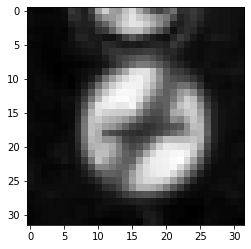

In [41]:
plt.imshow(color.rgb2gray(X_train[0]), cmap = plt.get_cmap('gray'))

Uczymy sie na szarych zdjeciach

In [47]:
X_train_gray = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray(X_test).reshape(-1,32,32,1)

model = get_cnn_v4((32,32,1),num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.6044 - accuracy: 0.2739 - val_loss: 0.6099 - val_accuracy: 0.8079
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.4890 - accuracy: 0.8447 - val_loss: 0.0865 - val_accuracy: 0.9746
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2156 - accuracy: 0.9328 - val_loss: 0.0470 - val_accuracy: 0.9856
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1574 - accuracy: 0.9492 - val_loss: 0.0359 - val_accuracy: 0.9900
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1206 - accuracy: 0.9624 - val_loss: 0.0213 - val_accuracy: 0.9938


0.9605442176870749